In [17]:
# Import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [113]:
df = pd.read_excel('./BELIZE_DATI_BIN_OPHI.xlsx')

In [3]:
df.head()

,hh_id,ind_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,miss,weighted_sum,multi_poor
0,101,100101,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
1,101,100102,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
2,102,100201,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
3,103,100301,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
4,103,100302,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0


In [4]:
df.shape

(19257, 15)

In [5]:
df.columns

Index(['hh_id', 'ind_id', 'd_cm', 'd_nutr', 'd_satt', 'd_educ', 'd_elct',
       'd_wtr', 'd_sani', 'd_hsg', 'd_ckfl', 'd_asst', 'miss', 'weighted_sum',
       'multi_poor'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19257 entries, 0 to 19256
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hh_id         19257 non-null  int64  
 1   ind_id        19257 non-null  int64  
 2   d_cm          19098 non-null  float64
 3   d_nutr        18409 non-null  float64
 4   d_satt        19251 non-null  float64
 5   d_educ        19094 non-null  float64
 6   d_elct        19257 non-null  int64  
 7   d_wtr         19257 non-null  int64  
 8   d_sani        19257 non-null  int64  
 9   d_hsg         19250 non-null  float64
 10  d_ckfl        19257 non-null  int64  
 11  d_asst        19257 non-null  int64  
 12  miss          19257 non-null  int64  
 13  weighted_sum  18169 non-null  float64
 14  multi_poor    18169 non-null  float64
dtypes: float64(7), int64(8)
memory usage: 2.2 MB


In [9]:
for column in df.columns[2:-2]:
    df[column] = df[column].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19257 entries, 0 to 19256
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   hh_id         19257 non-null  int64   
 1   ind_id        19257 non-null  int64   
 2   d_cm          19098 non-null  category
 3   d_nutr        18409 non-null  category
 4   d_satt        19251 non-null  category
 5   d_educ        19094 non-null  category
 6   d_elct        19257 non-null  category
 7   d_wtr         19257 non-null  category
 8   d_sani        19257 non-null  category
 9   d_hsg         19250 non-null  category
 10  d_ckfl        19257 non-null  category
 11  d_asst        19257 non-null  category
 12  miss          19257 non-null  category
 13  weighted_sum  18169 non-null  float64 
 14  multi_poor    18169 non-null  float64 
dtypes: category(11), float64(2), int64(2)
memory usage: 810.1 KB


In [14]:
df.describe()

,hh_id,ind_id,weighted_sum,multi_poor
count,19257.000000,1.925700e+04,18169.000000,18169.000000
mean,11043.279015,1.103203e+07,0.079161,0.055314
std,6486.814150,6.486737e+06,0.114116,0.228598
min,101.000000,1.001010e+05,0.000000,0.000000
25%,5122.000000,5.102202e+06,0.000000,0.000000
50%,11220.000000,1.120200e+07,0.000000,0.000000
75%,16710.000000,1.670101e+07,0.166667,0.000000
max,21824.000000,2.180241e+07,0.722222,1.000000


In [19]:
# Calculate the percentage of 1s, 0s, and NaN values for each variable
percentage_counts = {}
for col in df.columns[2:-2]:
    if pd.api.types.is_categorical_dtype(df[col]):
        counts = df[col].value_counts(normalize=True)
        percentage_counts[col] = {
            '1': counts.get(1, 0) * 100,
            '0': counts.get(0, 0) * 100,
            'NaN': df[col].isna().mean() * 100
        }

# Display the results
for col, counts in percentage_counts.items():
    print(f'\nVariable: {col}')
    print(f'Percentage of 1: {counts["1"]:.2f}%')
    print(f'Percentage of 0: {counts["0"]:.2f}%')
    print(f'Percentage of NaN: {counts["NaN"]:.2f}%')


Variable: d_cm
Percentage of 1: 3.73%
Percentage of 0: 96.27%
Percentage of NaN: 0.83%

Variable: d_nutr
Percentage of 1: 12.73%
Percentage of 0: 87.27%
Percentage of NaN: 4.40%

Variable: d_satt
Percentage of 1: 5.42%
Percentage of 0: 94.58%
Percentage of NaN: 0.03%

Variable: d_educ
Percentage of 1: 1.75%
Percentage of 0: 98.25%
Percentage of NaN: 0.85%

Variable: d_elct
Percentage of 1: 10.17%
Percentage of 0: 89.83%
Percentage of NaN: 0.00%

Variable: d_wtr
Percentage of 1: 4.86%
Percentage of 0: 95.14%
Percentage of NaN: 0.00%

Variable: d_sani
Percentage of 1: 13.41%
Percentage of 0: 86.59%
Percentage of NaN: 0.00%

Variable: d_hsg
Percentage of 1: 19.74%
Percentage of 0: 80.26%
Percentage of NaN: 0.04%

Variable: d_ckfl
Percentage of 1: 17.67%
Percentage of 0: 82.33%
Percentage of NaN: 0.00%

Variable: d_asst
Percentage of 1: 4.18%
Percentage of 0: 95.82%
Percentage of NaN: 0.00%

Variable: miss
Percentage of 1: 5.65%
Percentage of 0: 94.35%
Percentage of NaN: 0.00%


In [7]:
# Missing values
df.isnull().sum()

hh_id              0
ind_id             0
d_cm             159
d_nutr           848
d_satt             6
d_educ           163
d_elct             0
d_wtr              0
d_sani             0
d_hsg              7
d_ckfl             0
d_asst             0
miss               0
weighted_sum    1088
multi_poor      1088
dtype: int64

In [20]:
# Missing Values Percentage
df.isnull().sum()/len(df)*100

hh_id           0.000000
ind_id          0.000000
d_cm            0.825674
d_nutr          4.403593
d_satt          0.031158
d_educ          0.846445
d_elct          0.000000
d_wtr           0.000000
d_sani          0.000000
d_hsg           0.036350
d_ckfl          0.000000
d_asst          0.000000
miss            0.000000
weighted_sum    5.649894
multi_poor      5.649894
dtype: float64

The presented output displays the percentage of missing values for each variable in the dataset. Notably, the unique identifiers, `hh_id` and `ind_id`, exhibit no missing values, ensuring the integrity of household and individual identification. However, variables such as `d_nutr` and `d_educ` demonstrate relatively higher percentages of missing values, suggesting a need for cautious interpretation, especially considering their significance in measuring malnutrition and educational attainment. For variables like `d_satt` with minimal missing values, straightforward analysis may proceed without substantial concerns. Careful consideration of missing data is crucial to maintaining the robustness and reliability of subsequent analyses.

In [16]:
# Unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for hh_id: [  101   102   103 ... 21822 21823 21824]
Unique values for ind_id: [  100101   100102   100201 ... 21802404 21802405 21802406]
Unique values for d_cm: [ 0.  1. nan]
Unique values for d_nutr: [ 0.  1. nan]
Unique values for d_satt: [ 0.  1. nan]
Unique values for d_educ: [ 0.  1. nan]
Unique values for d_elct: [0 1]
Unique values for d_wtr: [0 1]
Unique values for d_sani: [0 1]
Unique values for d_hsg: [ 0.  1. nan]
Unique values for d_ckfl: [0 1]
Unique values for d_asst: [0 1]
Unique values for miss: [0 1]
Unique values for weighted_sum: [0.         0.16666667 0.05555556 0.11111111 0.27777778        nan
 0.22222222 0.38888889 0.33333333 0.33333333 0.44444444 0.44444444
 0.5        0.38888889 0.55555556 0.61111111 0.5        0.66666667
 0.72222222]
Unique values for multi_poor: [ 0. nan  1.]


### Distribution 

In [24]:
len(df['hh_id'].unique()), len(df['ind_id'].unique())

(4636, 19257)

In [82]:
df_hhid_distr = df.groupby('hh_id', as_index=False)['ind_id'].size()
df_hhid_distr = df_hhid_distr.rename(columns={'hh_id': 'hh_id', 'size': 'ind_id_count'})
df_hhid_distr

,hh_id,ind_id_count
0,101,2
1,102,1
2,103,4
3,104,5
4,105,6
...,...,...
4631,21820,5
4632,21821,10
4633,21822,3
4634,21823,6


In [86]:
ind_id_count_distr = df_hhid_distr.groupby('ind_id_count', as_index=False)['hh_id'].size()
ind_id_count_distr

,ind_id_count,size
0,1,604
1,2,619
2,3,769
3,4,860
4,5,675
5,6,439
6,7,276
7,8,173
8,9,85
9,10,53


In [93]:
ind_id_count_distr.iloc[0,0]

1

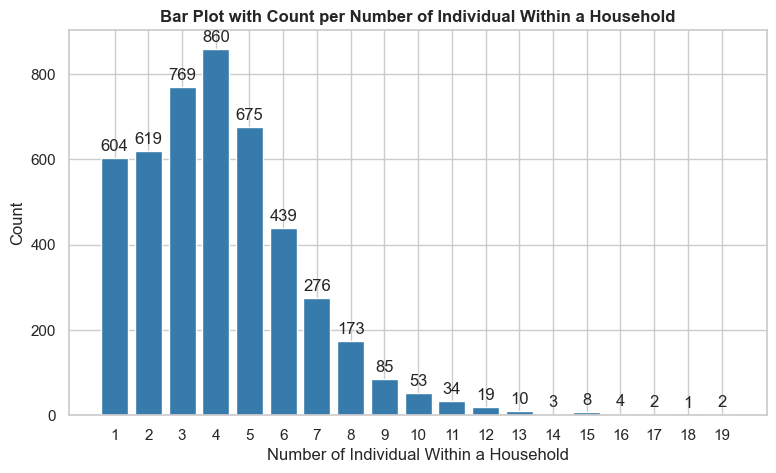

In [111]:
# Assuming your data is in a DataFrame named df
df = pd.DataFrame({
    'ind_id_count': [604, 619, 769, 860, 675, 439, 276, 173, 85, 53, 34, 19, 10, 3, 8, 4, 2, 1, 2],
    'size': list(range(1, 20))
})

# Set the width of the bars
bar_width = 0.8  # Adjust this value to control the width of the bars

# Set the figsize for the entire figure
fig, ax = plt.subplots(figsize=(9,5))

# Create a bar plot with more space between bars
ax.bar(df['size'], df['ind_id_count'], width=bar_width, color=sns.color_palette("Blues_d")[-3])

# Add value labels on top of each bar
for i, value in enumerate(df['ind_id_count']):
    ax.text(df['size'][i], value + 10, str(value), ha='center', va='bottom')

# Add labels and title
ax.set_xlabel('Number of Individual Within a Household')
ax.set_ylabel('Count')
ax.set_title('Bar Plot with Count per Number of Individual Within a Household' , fontweight='bold')

# Adjust x-axis ticks and labels to center bars
ax.set_xticks(df['size'])
ax.set_xticklabels(df['size'], ha='center')

# Adjust space between subplots
plt.subplots_adjust(wspace=0.5)  # Adjust this value to control the space between bars

# Show the plot
plt.show()


There are 4636 households and 

## Visualizations

In [30]:
def bar_plot_categorical(variable: pd.core.series.Series, variable_name:str):
    
    # Assuming df is your DataFrame
    sns.set(style="whitegrid")

    # Calculate the percentage distribution
    percentage_d_cm = variable.value_counts(normalize=True) * 100

    # Create a bar plot
    ax = sns.barplot(x=percentage_d_cm.index, y=percentage_d_cm.values, palette="Blues_d")

    # Adding percentage values on top of the bars
    for i, value in enumerate(percentage_d_cm):
        ax.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

    # Adding labels and manually setting the title to bold
    ax.set(xlabel=variable_name, ylabel='Percentage (%)')
    ax.set_title(f'Percentage Distribution of {variable_name}', fontweight='bold')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()
    
    return

In [51]:
def bar_plot_categorical_subplot(variables: list, variable_names: list):
    # Assuming df is your DataFrame
    sns.set(style="whitegrid")
    
    # Calculate the number of rows and columns for the subplots
    rows = len(variables) // 2 + len(variables) % 2
    cols = 2

    # Set up the subplot grid
    fig, axes = plt.subplots(rows, cols, figsize=(12, 16))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Loop through each variable and create a bar plot
    for i, (variable, variable_name) in enumerate(zip(variables, variable_names)):
        # Calculate the percentage distribution
        percentage_distribution = variable.value_counts(normalize=True) * 100

        # Create a bar plot
        ax = sns.barplot(x=percentage_distribution.index, y=percentage_distribution.values, palette="Blues_d", ax=axes[i])

        # Adding percentage values on top of the bars
        for j, value in enumerate(percentage_distribution):
            ax.text(j, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

        # Set labels and title for each subplot
        ax.set(xlabel=variable_name, ylabel='Percentage (%)')
        ax.set_title(f'Percentage Distribution of {variable_name}', fontweight='bold')
    
    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()


In [52]:
# Example usage
variables = [df['d_cm'], df['d_nutr'], df['d_satt'], df['d_educ'], df['d_elct'],
             df['d_wtr'], df['d_sani'], df['d_hsg'], df['d_ckfl'], df['d_asst']]

variable_names = ['d_cm', 'd_nutr', 'd_satt', 'd_educ', 'd_elct',
                  'd_wtr', 'd_sani', 'd_hsg', 'd_ckfl', 'd_asst']

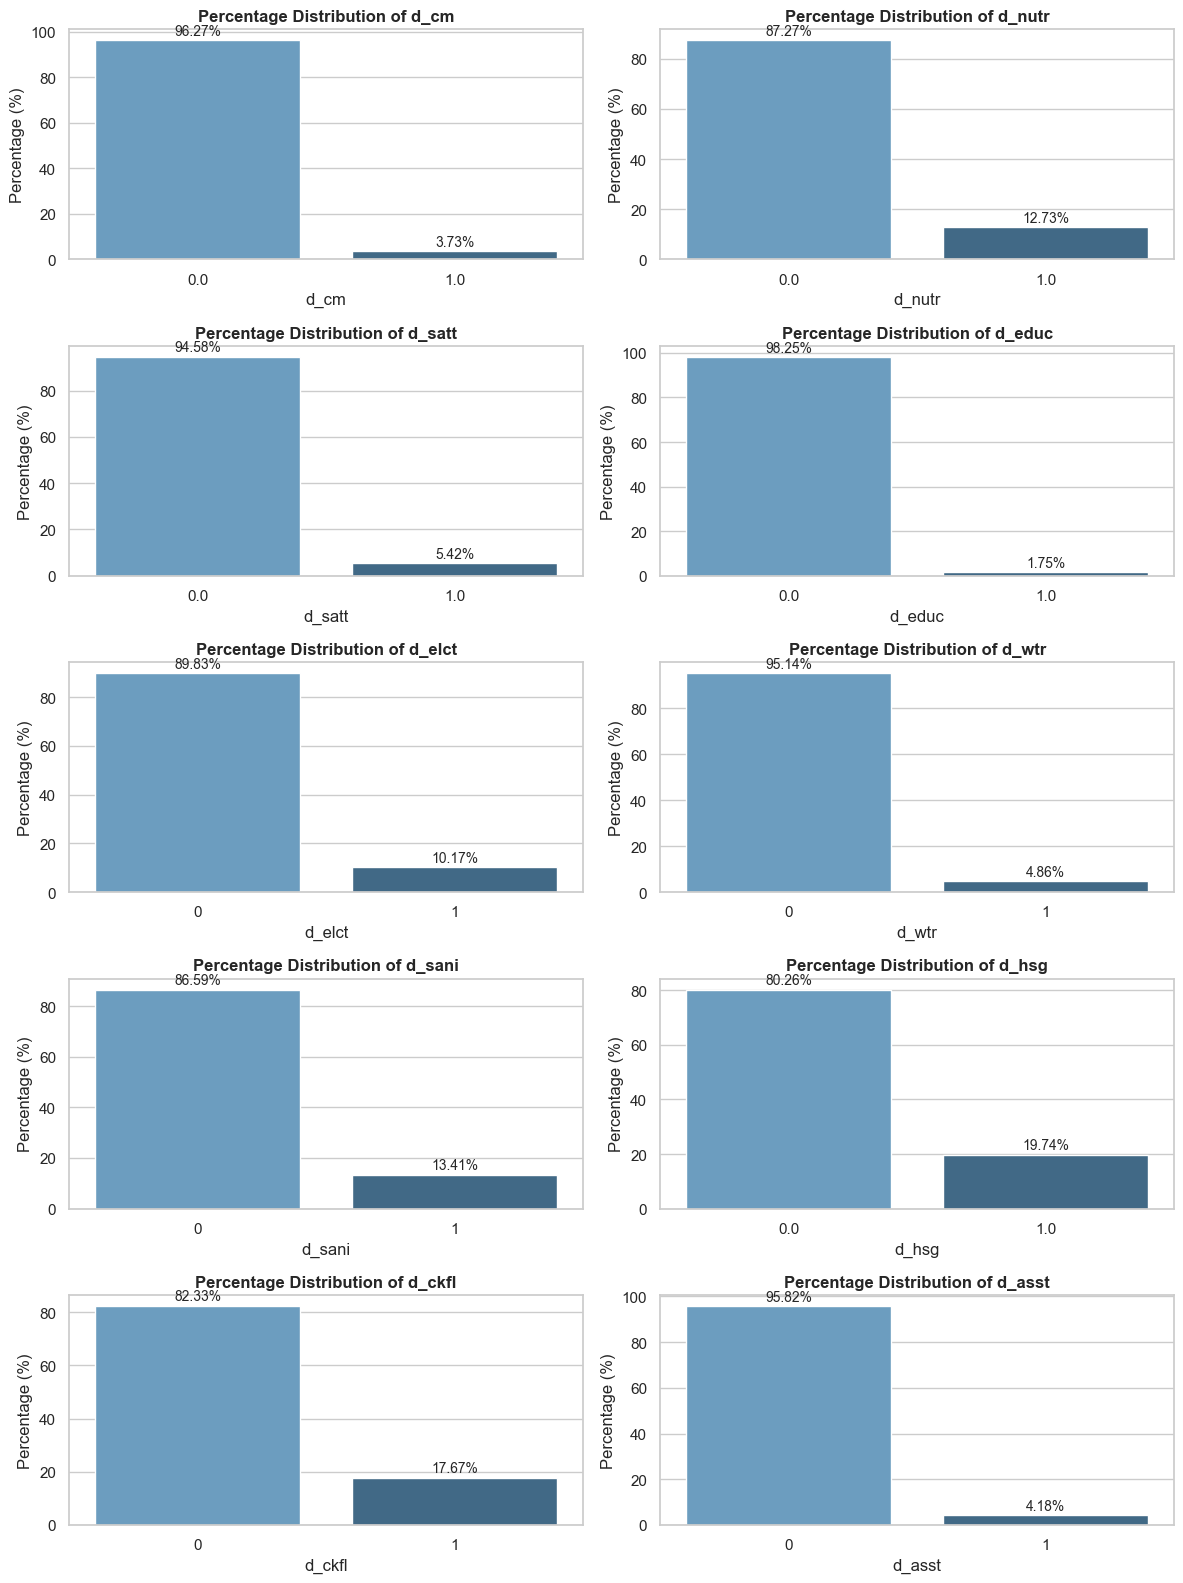

In [47]:
bar_plot_categorical_subplot(variables, variable_names)

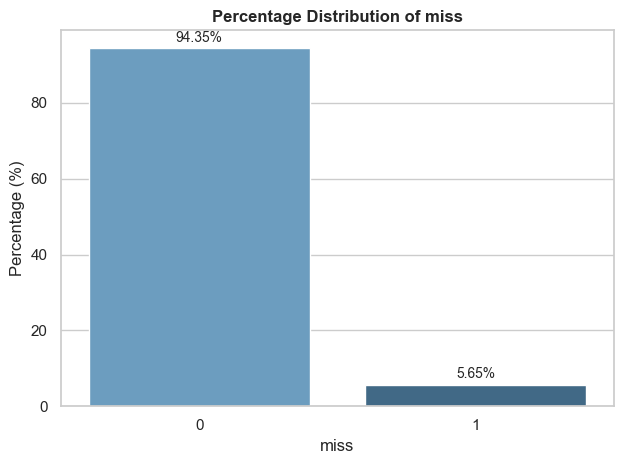

In [49]:
bar_plot_categorical(variable=df['miss'], variable_name='miss')

I can remove the 5.65% of rows.

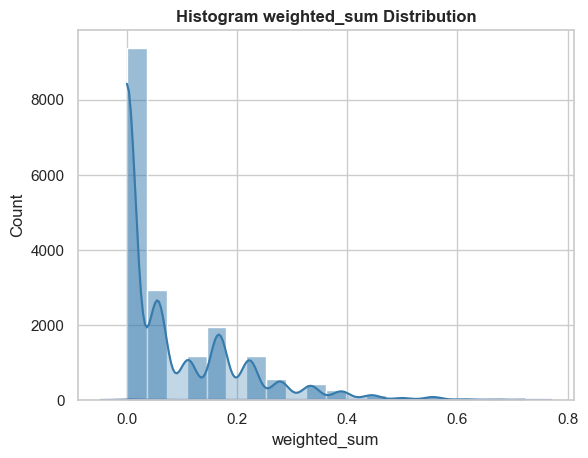

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for a continuous variable
sns.histplot(df['weighted_sum'], bins=20, kde=True, color=sns.color_palette("Blues_d")[-3])

# Extracting the values from the KDE plot to fill the area underneath
x, y = sns.kdeplot(df['weighted_sum'], fill=False).get_lines()[0].get_data()

# Filling the area underneath the curve with a darker blue
plt.fill_between(x, y, color=sns.color_palette("Blues_d")[-3], alpha=0.3)

plt.title("Histogram weighted_sum Distribution", fontweight='bold')

plt.show()



## Analysis

Remove rows without missing values. Maybe let's consider before to calculate the weighted values for weighted_sum

In [114]:
df.head()

,hh_id,ind_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,miss,weighted_sum,multi_poor
0,101,100101,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
1,101,100102,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
2,102,100201,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
3,103,100301,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
4,103,100302,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0


In [115]:
df_nomiss = df[df['miss'] != 1]

In [116]:
df_nomiss

,hh_id,ind_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,miss,weighted_sum,multi_poor
0,101,100101,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
1,101,100102,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
2,102,100201,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
3,103,100301,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
4,103,100302,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19252,21824,21802402,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
19253,21824,21802403,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
19254,21824,21802404,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
19255,21824,21802405,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
